In [ ]:
import math 
from random import seed
from random import random
import ROOT
# seed random number generator
seed(1)
# generate some random numbers

def randErr(fcorr):

    X0m = 0
    X12m = 0
    X1m = 0
    X2m = 0
    X11m = 0
    X22m = 0

    corr = fcorr
    f = math.sqrt((1-corr)/corr)

    mu = 0.5*(1+f)
    sigma = math.sqrt(1/3. - 1/4.)*math.sqrt(1+f**2)

#    print f, mu, sigma, 2**2
    
    n=10000
    for i in range(1, n):
        X0 = random()
        X1 = X0+f*random()
        X2 = X0+f*random()

        X11m = X11m+X1*X1
        X22m = X22m+X2*X2
        X12m = X12m+X1*X2

        X0m = X0m+X0
        X1m = X1m+X1
        X2m = X2m+X2


    X22m = X22m/n
    X11m = X11m/n
    X12m = X12m/n
    X1m = X1m/n
    X2m = X2m/n
    X0m = X0m/n

        
    X1var = X11m - X1m*X1m    
    X2var = X22m - X2m*X2m
    X12cov = (X12m - X1m*X2m)
    X12corr = X12cov/math.sqrt(X1var*X2var)    


#print('X1m = {:f} '.format(X1m), 'X2m = {:f} '.format(X2m), 'X0m = {:f} '.format(X0m))
#    print('X1var = {:f} '.format(X1var), 'X2var = {:f} '.format(X2var), ' X12cov = {:f}'.format(X12cov)) 
#print('X12corr = {:f}'.format(X12corr), ' original corr = ', corr)


#print('mu = {:f} '.format(mu), 'X1m = {:f} '.format(X1m), 'diff = {:f} '.format(mu-X1m), 'err = {:f} '.format(err))

    err = sigma/math.sqrt(n)
    diff = X2m-X1m
    err_diff = math.sqrt(2.)*err*math.sqrt(1-corr)

    diffSigma = math.sqrt(X1var)-math.sqrt(X2var)
    
    #print math.sqrt(X1var), ' rms exp ', sigma 
    #print diffSigma, ' ', diffSigma/(math.sqrt(2.)*math.sqrt(1-corr))
    varDiffErr = sigma-math.sqrt(X1var)
    
#    *math.sqrt((1-corr))
    return [diff/err_diff, diffSigma/(err*math.sqrt(2.)*math.sqrt(1-corr))]
    
#print('Final comparison diff = {:f} '.format(diff), 'err_diff = {:f} '.format(err_diff), 'rate = {:f} '.format(diff/err_diff))





In [19]:
fcorr=0.997
randErr(fcorr)
randErr(fcorr)

[0.3006743168270168, 0.9445846612703421]

In [20]:
eHist = ROOT.TH1F("eHist", "X1 and X2 DeltaMean uncertainty with corr = "+str(fcorr), 20, -4, 4)
eDiffRMSHist = ROOT.TH1F("eRMSHist", "X1 and X2 DeltaRMS uncertainty with corr = "+str(fcorr), 20, -4, 4)


Warning in <TROOT::Append>: Replacing existing TH1: eHist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: eRMSHist (Potential memory leak).


In [21]:
for i in range(1, 10000):
    res = randErr(fcorr)
    eHist.Fill(res[0])
    eDiffRMSHist.Fill(res[1])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv
Info in <TCanvas::Print>: pdf file ToyCorrelations0.997.pdf has been created


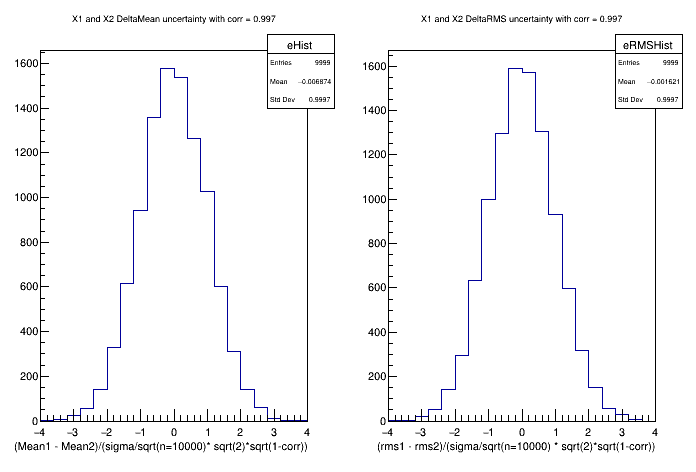

In [22]:
canv = ROOT.TCanvas("canv", "canv")
canv.Draw()
canv.Divide(2)
canv.cd(1)

eHist.SetXTitle('(Mean1 - Mean2)/(sigma/sqrt(n=10000)* sqrt(2)*sqrt(1-corr))')
eHist.Draw()

canv.cd(2)
eDiffRMSHist.SetXTitle('(rms1 - rms2)/(sigma/sqrt(n=10000) * sqrt(2)*sqrt(1-corr))')

eDiffRMSHist.Draw()

canv.SaveAs('ToyCorrelations'+str(fcorr)+'.pdf')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Info in <TCanvas::Print>: pdf file SimplifiedModel.pdf has been created


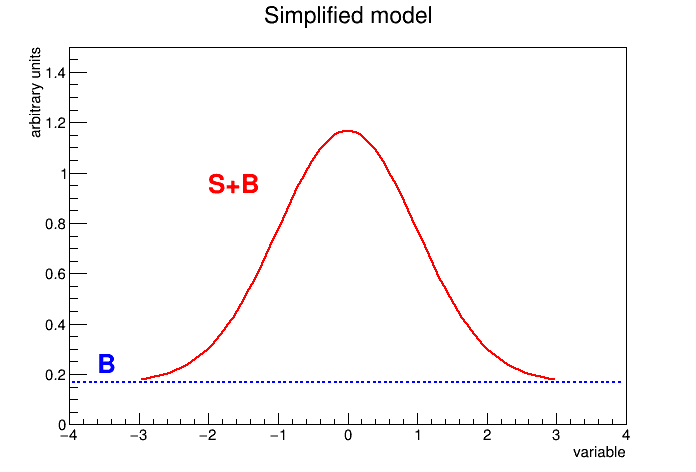

In [38]:
canva = ROOT.TCanvas("canv", "canv")
canva.Draw()

funcBkg = ROOT.TF1("Bkg", "1./6", -4, 4)
funcSigBkg = ROOT.TF1("SigBkg", "1./6+TMath::Gaus(x,0,1)", -3, 3)

funcBkg.SetLineColor(ROOT.kBlue)
funcBkg.SetLineStyle(2)

hist = ROOT.TH1F("hist", "Simplified model; variable; arbitrary units", 1, -4, 4)
hist.Draw()
hist.SetMaximum(1.5)
hist.SetMinimum(0)
hist.SetStats(0)

funcBkg.Draw('SAME')
funcSigBkg.Draw('SAME')

latex = ROOT.TLatex()
latex.SetTextSize(0.060);
latex.SetTextAlign(13); 
latex.SetTextColor(ROOT.kRed)
latex.DrawLatex(-2, 1, 'S+B');

latex.SetTextColor(ROOT.kBlue)
latex.DrawLatex(-3.6, 0.28, 'B');

canva.SaveAs("SimplifiedModel.pdf")
